In [1]:
## imports
import pandas as pd
import ast
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from embeddings import * 
from user import *
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import random

# Create Semantic Clusters

## Data

In [ ]:
## load data
df = pd.read_csv("vocab_with_embeddings.csv", encoding='utf-8', index_col=0, keep_default_na=False)
data = [ast.literal_eval(x) for x in df["en_embedding"]]

## Inertia

In [3]:
## compute intertia
inertias = []

for i in range(1,100):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

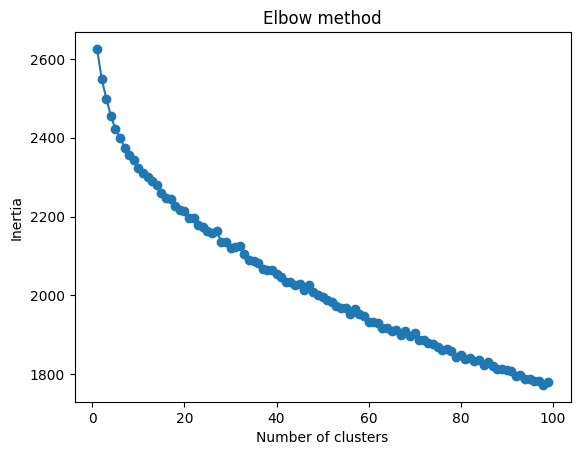

In [4]:
## plot inertia
plt.plot(range(1,100), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
## figure out the actual elbow point
x = range(0, len(inertias))
kn = KneeLocator(x, inertias, curve='convex', direction='decreasing')
elbow_point = kn.knee
print(elbow_point)

20


## Actual Clustering

In [6]:
## cluster based on intertia computed
kmeans = KMeans(n_clusters=elbow_point, random_state=42)
labels = kmeans.fit_predict(data)

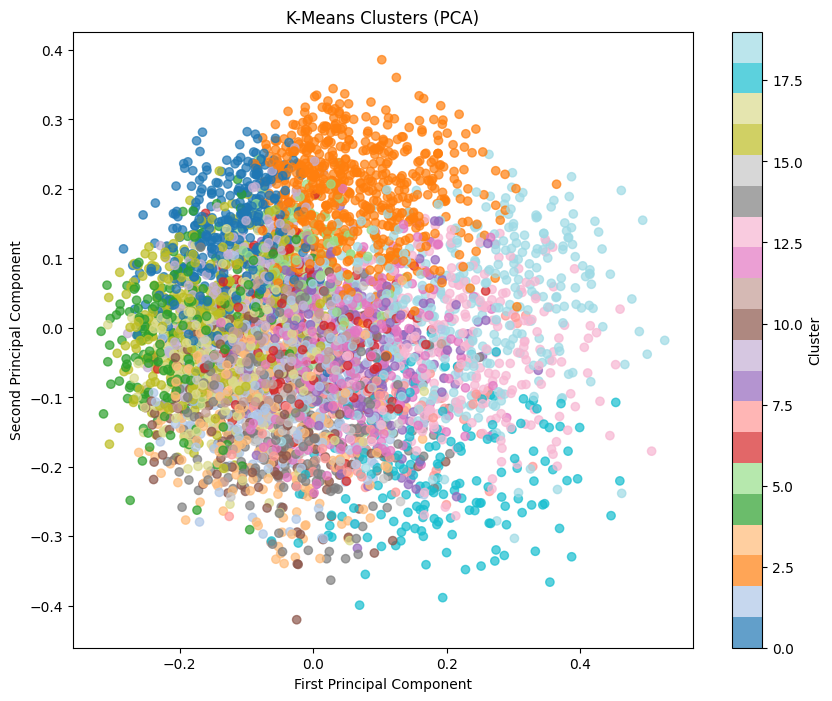

In [7]:
## show on a plane using pca
pca = PCA(n_components=2, random_state=42)
data_2d = pca.fit_transform(data)

plt.figure(figsize=(10, 8))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab20', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('K-Means Clusters (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
## print out clusters
vocab_en = df["en"]
clusters = {}

for cluster_id in range(elbow_point):
    cluster_indices = np.where(labels == cluster_id)[0]
    clusters[cluster_id] = [vocab_en[i] for i in cluster_indices]

# print all clusters
for cluster_id, words in clusters.items():
    print(f"Cluster {cluster_id}: {words}")

Cluster 0: ['aircraft', 'airline', 'airport', 'alarm', 'alcohol', 'arm', 'armed', 'arms', 'athlete', 'bag', 'balance', 'ball', 'band', 'bank', 'bank', 'bar', 'baseball', 'basketball', 'bath', 'bathroom', 'battery', 'beach', 'bed', 'bedroom', 'beer', 'bicycle', 'bike', 'bill', 'blonde', 'board', 'boat', 'boot', 'bottle', 'box', 'branch', 'brand', 'building', 'bus', 'cable', 'cafe', 'cake', 'car', 'carpet', 'carry', 'case', 'cash', 'cast', 'castle', 'cat', 'cell', 'chain', 'chair', 'champion', 'chocolate', 'church', 'cigarette', 'cinema', 'classroom', 'climb', 'clothes', 'clothing', 'club', 'coal', 'coffee', 'coin', 'collection', 'column', 'concert', 'construction', 'container', 'cook', 'cooker', 'cooking', 'costume', 'course', 'court', 'cross', 'crowd', 'cupboard', 'currency', 'dance', 'dancer', 'dancing', 'device', 'diamond', 'dollar', 'dress', 'dressed', 'drive', 'driving', 'drug', 'electric', 'electrical', 'electricity', 'engine', 'entrance', 'equipment', 'euro', 'expedition', 'facto

In [ ]:
## check cluster sizes
for cluster_id, cluster in clusters.items():
    print(f"Cluster {cluster_id} length: {len(cluster)}")

Cluster 0 length: 396
Cluster 1 length: 285
Cluster 2 length: 634
Cluster 3 length: 274
Cluster 4 length: 196
Cluster 5 length: 168
Cluster 6 length: 155
Cluster 7 length: 111
Cluster 8 length: 312
Cluster 9 length: 176
Cluster 10 length: 165
Cluster 11 length: 95
Cluster 12 length: 241
Cluster 13 length: 284
Cluster 14 length: 260
Cluster 15 length: 97
Cluster 16 length: 353
Cluster 17 length: 246
Cluster 18 length: 182
Cluster 19 length: 366


In [ ]:
## save clusters as csv
cluster_df = pd.DataFrame()
for cluster_id, cluster in clusters.items():
    cluster_df = cluster_df.append({'word': , 'cluster': cluster_id}, ignore_index=True)
cluster_df.to_csv('clusters.csv', index=False)  

## Generate Testing Items

In [10]:
for cluster_id, cluster in clusters.items():
    print(f"Representative from Cluster {cluster_id}: {random.choice(cluster)}")

Representative from Cluster 0: toy
Representative from Cluster 1: utility
Representative from Cluster 2: shatter
Representative from Cluster 3: promise
Representative from Cluster 4: engineer
Representative from Cluster 5: their
Representative from Cluster 6: June
Representative from Cluster 7: classic
Representative from Cluster 8: sixty
Representative from Cluster 9: acre
Representative from Cluster 10: connection
Representative from Cluster 11: recovery
Representative from Cluster 12: exile
Representative from Cluster 13: satisfy
Representative from Cluster 14: criticize
Representative from Cluster 15: grade
Representative from Cluster 16: outline
Representative from Cluster 17: commodity
Representative from Cluster 18: secure
Representative from Cluster 19: enemy
